The below column reference:

step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig: customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrig: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recipient before the transaction

newbalanceDest: the new balance of recipient after the transaction

isFraud: fraud transaction


In [75]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,cohen_kappa_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

In [49]:
data=pd.read_csv('fraud detection.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [50]:
data=data.drop('isFlaggedFraud',axis=1)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [51]:
data['isFraud']=data['isFraud'].astype(object)

In [52]:
data.shape

(6362620, 10)

In [53]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud            object
dtype: object

In [54]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


In [55]:
data.describe(include=object)

,type,nameOrig,nameDest,isFraud
count,6362620,6362620,6362620,6362620
unique,5,6353307,2722362,2
top,CASH_OUT,C545315117,C1286084959,0
freq,2237500,3,113,6354407


In [56]:
data=data.drop(['nameOrig','nameDest'],axis=1)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [57]:
data['type'].value_counts(normalize=True)*100

CASH_OUT    35.166331
PAYMENT     33.814608
CASH_IN     21.992261
TRANSFER     8.375622
DEBIT        0.651178
Name: type, dtype: float64

In [58]:
total=data.isnull().sum()

percent=data.isnull().sum()*100/len(data)

null=pd.concat([total,percent],axis=1)
null

,0,1
step,0,0.0
type,0,0.0
amount,0,0.0
oldbalanceOrg,0,0.0
newbalanceOrig,0,0.0
oldbalanceDest,0,0.0
newbalanceDest,0,0.0
isFraud,0,0.0


<AxesSubplot:>

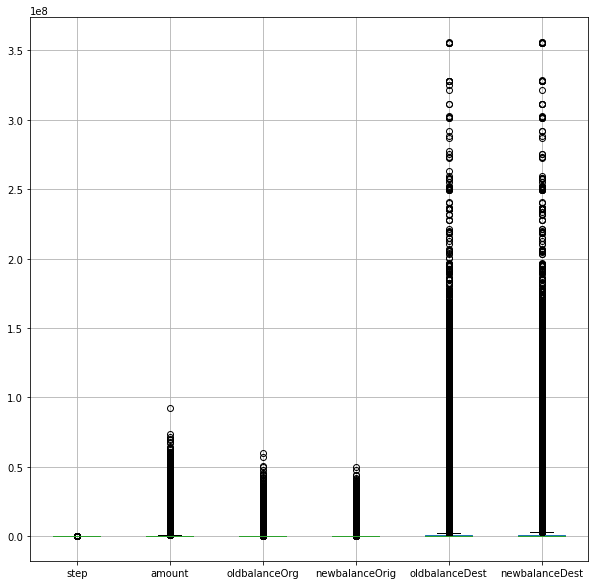

In [59]:
plt.figure(figsize=(10,10))
data.boxplot()

In [60]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)

iqr=q3-q1

data_final=data[~((data<(q1-1.5*iqr))|(data>(q3+1.5*iqr))).any(axis=1)].reset_index(drop=True)
data_final.shape

<ipython-input-60-2d7f2464946c>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_final=data[~((data<(q1-1.5*iqr))|(data>(q3+1.5*iqr))).any(axis=1)].reset_index(drop=True)
<ipython-input-60-2d7f2464946c>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_final=data[~((data<(q1-1.5*iqr))|(data>(q3+1.5*iqr))).any(axis=1)].reset_index(drop=True)


(4321893, 8)

<AxesSubplot:>

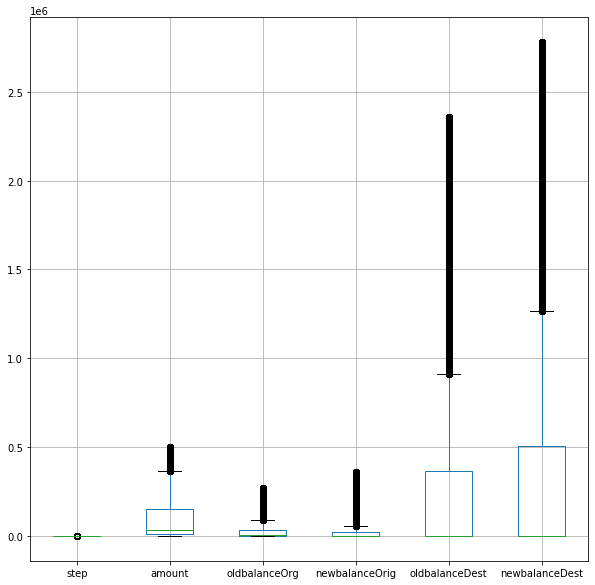

In [61]:
plt.figure(figsize=(10,10))
data_final.boxplot()

C:\Users\THARA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

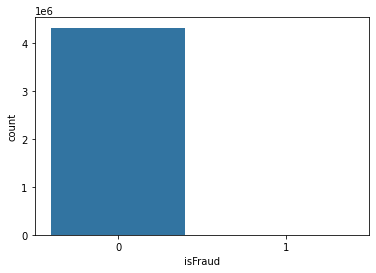

In [62]:
#data imbalance

sb.countplot(data_final['isFraud'])

In [63]:
data_final['isFraud'].value_counts()

0    4319406
1       2487
Name: isFraud, dtype: int64

<AxesSubplot:>

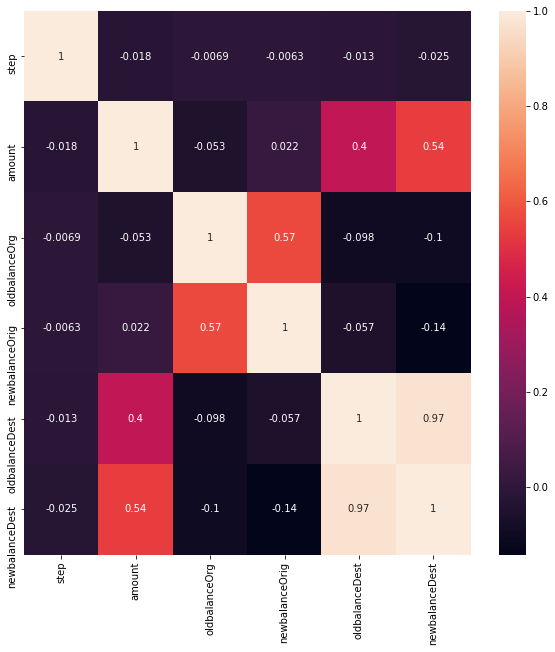

In [64]:
plt.figure(figsize=(10,10))
sb.heatmap(data_final.corr(),annot=True)

C:\Users\THARA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


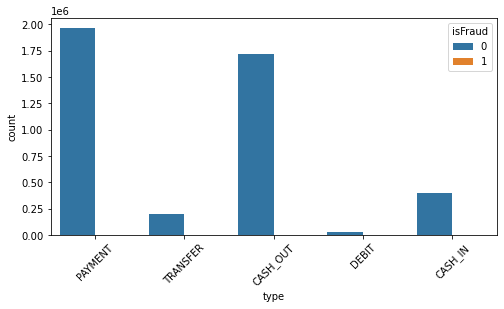

C:\Users\THARA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


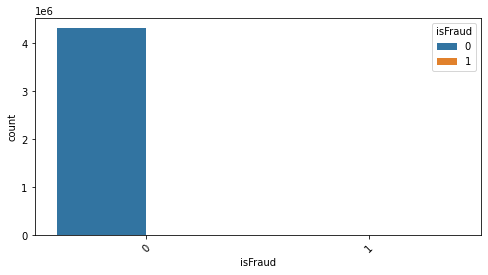

In [82]:
for i in data_final.select_dtypes(include=object).columns:
    plt.figure(figsize=(8,4))
    sb.countplot(data_final[i],hue=data_final['isFraud'])
    plt.xticks(rotation=45)
    plt.show()

In [67]:
#scaling

data_num=data_final.select_dtypes(np.number)
data_cat=data_final.select_dtypes(object)

ss=StandardScaler()
scale=ss.fit_transform(data_num)
num_scaled=pd.DataFrame(scale,columns=data_num.columns)
num_scaled.shape

(4321893, 6)

In [68]:
dummy=pd.get_dummies(data_cat,drop_first=True)
dummy

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud_1
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,0,1,1
3,1,0,0,0,1
4,0,0,1,0,0
...,...,...,...,...,...
4321888,0,1,0,0,0
4321889,0,0,0,1,1
4321890,0,0,0,1,1
4321891,0,0,0,1,1


In [69]:
scaled_final=pd.concat([num_scaled,dummy],axis=1)
scaled_final.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud_1
0,-1.796041,-0.740796,2.628443,1.882210,-0.564312,-0.630741,0,0,1,0,0
1,-1.796041,-0.811470,-0.183450,-0.184369,-0.564312,-0.630741,0,0,1,0,0
2,-1.796041,-0.826386,-0.581342,-0.468660,-0.564312,-0.630741,0,0,0,1,1
3,-1.796041,-0.826386,-0.581342,-0.468660,-0.522323,-0.630741,1,0,0,0,1
4,-1.796041,-0.724592,0.200032,-0.030361,-0.564312,-0.630741,0,0,1,0,0


In [87]:
X=scaled_final.drop('isFraud_1',axis=1)
y=scaled_final['isFraud_1']             
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print(X_train.shape)               
print(X_test.shape)          
print(y_train.shape)                 
print(y_test.shape)                 
               

            

(3025325, 10)
(1296568, 10)
(3025325,)
(1296568,)


In [93]:
dt=DecisionTreeClassifier(class_weight='balanced').fit(X_train,y_train)
dt_y_pred_train=dt.predict(X_train)
dt_y_pred_test=dt.predict(X_test)
dt_pred_prob_train=dt.predict_proba(X_train)[:,1]
dt_pred_prob_test=dt.predict_proba(X_test)[:,1]

In [94]:
print(classification_report(y_train,dt_y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   3023572
           1       1.00      1.00      1.00      1753

    accuracy                           1.00   3025325
   macro avg       1.00      1.00      1.00   3025325
weighted avg       1.00      1.00      1.00   3025325



In [96]:
print(classification_report(y_test,dt_y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1295834
           1       0.79      0.68      0.73       734

    accuracy                           1.00   1296568
   macro avg       0.89      0.84      0.87   1296568
weighted avg       1.00      1.00      1.00   1296568



In [ ]:
# Since there is imbalance present, accuracy might not provide proper results.

<AxesSubplot:>

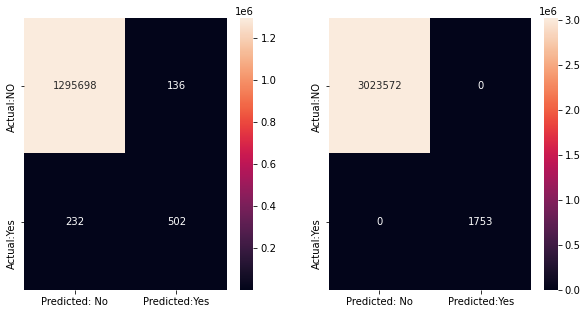

In [97]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
cm=confusion_matrix(y_test,dt_y_pred_test)

matrix=pd.DataFrame(cm,columns=['Predicted: No','Predicted:Yes'],index=['Actual:NO','Actual:Yes'])

sb.heatmap(matrix,annot=True,fmt='d')

plt.subplot(1,2,2)

cm_train=confusion_matrix(y_train,dt_y_pred_train)

matrix1=pd.DataFrame(cm_train,columns=['Predicted: No','Predicted:Yes'],index=['Actual:NO','Actual:Yes'])

sb.heatmap(matrix1,annot=True,fmt='d')

0.8419093770037883


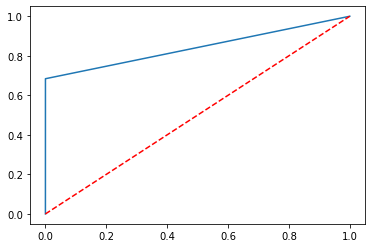

In [98]:
fpr,tpr,threshhold=roc_curve(y_test,dt_pred_prob_test)

plt.plot(fpr,tpr)
plt.xlim=[0.0,1.0]
plt.ylim=[0.0,1.0]

plt.plot([0,1],[0,1],'r--')

print(roc_auc_score(y_test,dt_pred_prob_test))

In [99]:
print(accuracy_score(y_train,dt_y_pred_train))
print((accuracy_score(y_test,dt_y_pred_test)))

1.0
0.9997161737756909


In [101]:
#random forest

rf=RandomForestClassifier(random_state=10,class_weight='balanced').fit(X_train,y_train)

y_pred_rf_train=rf.predict(X_train)
y_pred_rf_test=rf.predict(X_test)
y_pred_prob_train_rf=rf.predict_proba(X_train)[:,1]
y_pred_prob_test_rf=rf.predict_proba(X_test)[:,1]

In [102]:
#accuracy

print(accuracy_score(y_train,y_pred_rf_train))
print(accuracy_score(y_test,y_pred_rf_test))

1.0
0.9997531945875573


In [104]:
print(classification_report(y_train,y_pred_rf_train))

print(classification_report(y_test,y_pred_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   3023572
           1       1.00      1.00      1.00      1753

    accuracy                           1.00   3025325
   macro avg       1.00      1.00      1.00   3025325
weighted avg       1.00      1.00      1.00   3025325

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1295834
           1       0.99      0.57      0.72       734

    accuracy                           1.00   1296568
   macro avg       1.00      0.78      0.86   1296568
weighted avg       1.00      1.00      1.00   1296568



<AxesSubplot:>

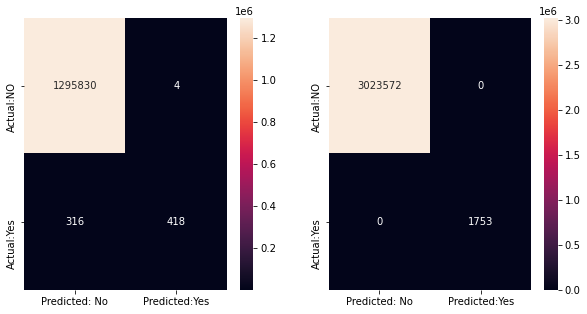

In [105]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
cm_rf=confusion_matrix(y_test,y_pred_rf_test)

matrix_rf=pd.DataFrame(cm_rf,columns=['Predicted: No','Predicted:Yes'],index=['Actual:NO','Actual:Yes'])

sb.heatmap(matrix_rf,annot=True,fmt='d')

plt.subplot(1,2,2)

cm_train_rf=confusion_matrix(y_train,y_pred_rf_train)

matrix_rf_t=pd.DataFrame(cm_train_rf,columns=['Predicted: No','Predicted:Yes'],index=['Actual:NO','Actual:Yes'])

sb.heatmap(matrix_rf_t,annot=True,fmt='d')

0.9895169124435275


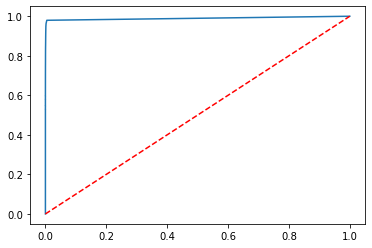

In [106]:

fpr,tpr,threshhold=roc_curve(y_test,y_pred_prob_test_rf)

plt.plot(fpr,tpr)

plt.xlim=[0.0,1.0]
plt.ylim=[0.0,1.0]

plt.plot([0,1],[0,1],'r--')

print(roc_auc_score(y_test,y_pred_prob_test_rf))

In [107]:
from xgboost import XGBClassifier

In [108]:
xg=XGBClassifier(random_state=10,learning_rate=1).fit(X_train,y_train)

y_pred_xg_train=xg.predict(X_train)
y_pred_xg_test=xg.predict(X_test)
y_pred_prob_train_xg=xg.predict_proba(X_train)[:,1]
y_pred_prob_test_xg=xg.predict_proba(X_test)[:,1]

C:\Users\THARA\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [109]:
print(accuracy_score(y_train,y_pred_xg_train))
print(accuracy_score(y_test,y_pred_xg_test))

0.9999996694570005
0.9998002418693042


In [110]:
print(classification_report(y_train,y_pred_xg_train))

print(classification_report(y_test,y_pred_xg_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   3023572
           1       1.00      1.00      1.00      1753

    accuracy                           1.00   3025325
   macro avg       1.00      1.00      1.00   3025325
weighted avg       1.00      1.00      1.00   3025325

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1295834
           1       0.90      0.72      0.80       734

    accuracy                           1.00   1296568
   macro avg       0.95      0.86      0.90   1296568
weighted avg       1.00      1.00      1.00   1296568



0.9954275110480961


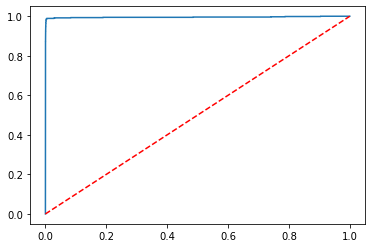

In [111]:
fpr,tpr,threshhold=roc_curve(y_test,y_pred_prob_test_xg)

plt.plot(fpr,tpr)

plt.xlim=[0.0,1.0]
plt.ylim=[0.0,1.0]

plt.plot([0,1],[0,1],'r--')

print(roc_auc_score(y_test,y_pred_prob_test_xg))

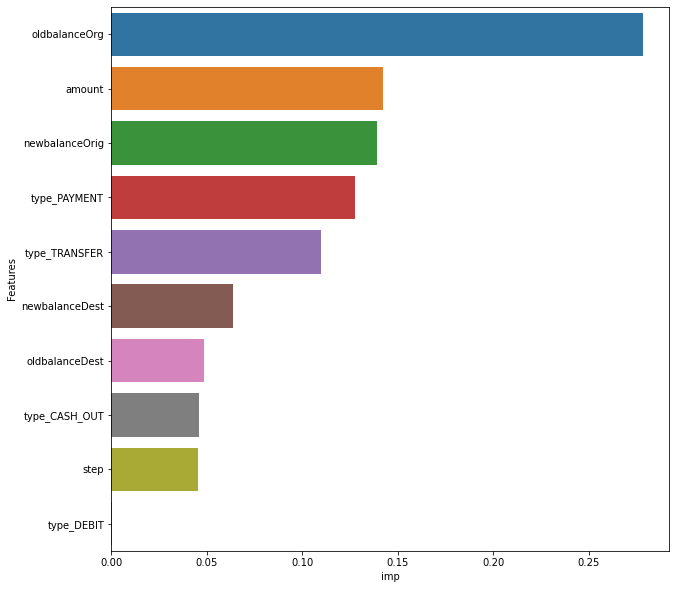

In [112]:

#important features
features=pd.DataFrame({'Features':X_train.columns,'imp':rf.feature_importances_})
features=features.sort_values('imp',ascending=False)
plt.figure(figsize=(10,10))
sb.barplot(x=features['imp'],y=features['Features'])
plt.show()

In [122]:
X.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'],
      dtype='object')

In [ ]:
#creating the model with best features

In [131]:
scaled_final.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER', 'isFraud_1'],
      dtype='object')

In [132]:
X1 = np.array(scaled_final[["type_PAYMENT", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y1 = np.array(scaled_final[["isFraud_1"]])

In [133]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)
rf1 = RandomForestClassifier(class_weight='balanced')
rf1.fit(X1_train, y1_train)
print(rf1.score(X1_train, y1_train))

<ipython-input-133-a94fecbbdda4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X1_train, y1_train)


0.999999338914001


In [138]:
s = np.array([[4, 1000.00, 3000.00, 0.0]])
print(rf1.predict(s))
#0 shows no fraud in payment.

[0]


In [141]:
s1 = np.array([[4, 10000.00, 30000.00, 30000.0]])
print(rf1.predict(s1))

[0]


In [ ]:
#due to imbalance in the dataset accuracy might not provide proper results.